<a href="https://colab.research.google.com/github/KelvinMulyawan/Pythonista/blob/main/Notebook/Machine%20Learning/Machine%20Learning%20-%20Classification%20and%20Regression%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification Tree

<p style="padding-left:30px"><b>We'll use Liver Dataset !</b></p>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/KelvinMulyawan/Gudang/master/liver.csv"

liver = pd.read_csv(url)

In [2]:
liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
liver.shape

(583, 11)

In [4]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
liver.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
liver.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

#### Exploratory Data Analysis

In [7]:
liver[['alkphos']].describe()[1:3]

,alkphos
mean,0.947064
std,0.319592


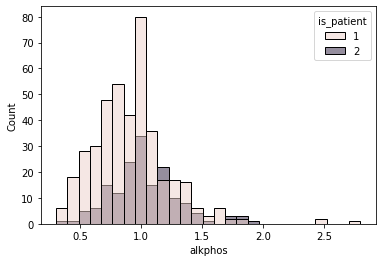

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.histplot(x='alkphos',data=liver,hue='is_patient')

In [9]:
liver[['alkphos']].agg(['mean','median','std'])

,alkphos
mean,0.947064
median,0.930000
std,0.319592


In [10]:
print(round(liver.alkphos.isnull().sum()/len(liver),2))

0.01


In [11]:
liver['alkphos'] = liver['alkphos'].fillna(liver['alkphos'].mean())

In [12]:
liver[['alkphos']].agg(['mean','median','std'])

,alkphos
mean,0.947064
median,0.947064
std,0.318492


In [13]:
liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

liver['gender'] = le.fit_transform(liver['gender'])

liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score

patient = liver['is_patient']

liver.drop('is_patient',1,inplace=True)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(liver,patient,test_size=0.3,random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
print(int(model.score(X_train,y_train)*100),"%")

100 %


In [20]:
print(int(model.score(X_test,y_test)*100),"%")

68 %


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predicted = model.predict(X_test)

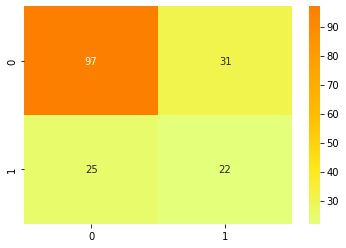

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,predicted)
ax = sns.heatmap(cm,annot=True,cmap='Wistia')

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
params = {'max_depth':[2,3,5,10,20],
          'min_samples_leaf':[5,10,20,25,50],
          'criterion':['gini','entropy']}

In [26]:
grid_search = GridSearchCV(estimator=model,param_grid=params,cv=4,verbose=1,n_jobs=-1,scoring='accuracy')

In [27]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


CPU times: user 397 ms, sys: 41.5 ms, total: 439 ms
Wall time: 2.2 s


[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.2s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     